<a href="https://colab.research.google.com/github/WalterPHD/Ai-Data/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scratch code

In [ ]:
class ScratchLogisticRegression():
  def __init__(self, num_iter, lr, bias, verbose, lam):
    self.num_iter = num_iter
    self.lr = lr
    self.bias = bias
    self.verbose = verbose
    self.lam = lam
    self.theta = np.array([])
    self.loss = np.array([])
    self.val_loss = np.array([])

def fit(self, X_train, y_train, X_val = None, y_val = None):
  ""
"train"
""
pass

def _gradient_descent(self, X, y):
  ""
"Θ update (steepest descent method)"
""
pass

def _sigmoid(self, y):
  ""
"sigmoidfunction"
""
pass

def _logistic_hypothesis(self, X):
  ""
"Hypothetical function"
""
pass

def predict(self, X):
  ""
"predict"
""
pass

def predict_proba(self, X):
  ""
"probabilistic prediction "
""
pass

def _loss_func(self, pred, y):
  ""
"cross entropy error function"
""
pass

# Creating Functions

In [ ]:
def _sigmoid(self, y):
    return 1 / (1 + np.exp(-y))


def _logistic_hypothesis(self, X):
    pred = X @ self.theta
    pred = self._sigmoid(pred)
    return pred

function with L2 regularization focus

In [ ]:
def _gradient_descent(self, X, y):
    m = X.shape[0]
    n = X.shape[1]
    pred = self._logistic_hypothesis(X)
    for j in range(n):
        gradient = 0
        for i in range(m):
            gradient += (pred[i] - y[i]) * X[i, j]
        self.theta[j] = self.theta[j] - self.lr * (
            (gradient + self.lam * self.theta[j]) / m
        )

functionn for prediction

In [ ]:
def predict_proba(self, X):
    if self.bias == True:
        a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack([a, X])
    pred = self._logistic_hypothesis(X)
    return pred

In [ ]:
def _loss_func(self, pred, y):
    error = 0
    for i in range(y.shape[0]):
        error += -np.sum(y[i] * np.log(pred[i]) + (1 - y[i]) * np.log(1 - pred[i]))
    loss = error / (y.shape[0])
    loss = loss + np.sum(self.theta**2) * self.lam / (2 * y.shape[0])
    return loss

visualization

In [ ]:
def decision_region(X, y, slr):
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]), np.max(X[:, 0]), 0.01),
        np.arange(np.min(X[:, 1]), np.max(X[:, 1]), 0.01),
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title("decision region")
    plt.xlabel("feature0")
    plt.ylabel("feature1")
    plt.contourf(mesh_f0, mesh_f1, y_pred, cmap=ListedColormap(["pink", "skyblue"]))
    plt.contour(mesh_f0, mesh_f1, y_pred, colors="red")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="0")
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="1")
    plt.legend()
    plt.show()

# Assignment Scratch Lositic Regression

# Problem 1 Hypothetical Function

Please implement the method of logistic regression assumption function in ScratchLogisticRegression class.

The assumed function for logistic regression is the assumed function for linear regression passed through the Sigmoid function. The sigmoid function is represented by the following equation

g​ ​(z)​ ​=​ ​1​ ​1​ ​+​ ​e-zg(z)=11+e−z

In [ ]:
def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


# Problem 2 Steepest Decent

Implement the steepest descent method for learning. Add a method _gradient_descent that updates the parameters as shown in the following equation, and call it from the fit method.

In [ ]:
def _gradient_descent(self, X, y):
        m, n = X.shape
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            # Regularize all parameters including theta_0 since no bias term here
            reg_term = self.lam * self.theta[j]
            self.theta[j] = self.theta[j] - self.lr * ((gradient + reg_term) / m)


# Problem 3 Estimated

Please implement the estimation mechanism. Add to the predict method and predict_proba method included in the template of ScratchLogisticRegression class.

The output of the hypothetical function $h_\theta(x)$ is the return value of predict_proba, and the return value of predict is a threshold value labeled 1 and 0.

In [ ]:
def _logistic_hypothesis(self, X):
        return self._sigmoid(X @ self.theta)

In [ ]:
def predict_proba(self, X):
        return self._logistic_hypothesis(X)


In [ ]:
def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)


# Problem 4 Objective Function


Implement the Objective function (loss function) of the logistic regression expressed in the following formula And make sure that this is recorded inself.loss, self.val_loss .



In [ ]:
def fit(self, X, y, X_val=None, y_val=None):
    """
    Train the logistic regression model using gradient descent.
    Records training and validation loss per iteration.
    """

    if self.bias:
        X = np.c_[np.ones(X.shape[0]), X]
        if X_val is not None:
            X_val = np.c_[np.ones(X_val.shape[0]), X_val]

    self.theta = np.zeros(X.shape[1])

    for i in range(self.iter):
        # Update parameters using gradient descent
        self._gradient_descent(X, y)

        # Compute and record training loss
        self.loss[i] = self._compute_loss(X, y)

        # Compute and record validation loss if validation data provided
        if X_val is not None and y_val is not None:
            self.val_loss[i] = self._compute_loss(X_val, y_val)

        # Verbose output to track training progress
        if self.verbose:
            msg = f"Iter {i+1}/{self.iter} - Train Loss: {self.loss[i]:.4f}"
            if X_val is not None and y_val is not None:
                msg += f" - Val Loss: {self.val_loss[i]:.4f}"
            print(msg)


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compiled code

In [23]:
import numpy as np
import matplotlib.pyplot as plt


class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    lam : float
      Regularization strength (lambda)
    verbose : bool
      True to output the learning process
    bias: bool
      True to include bias term

    Attributes
    ----------
    self.theta : ndarray, shape (n_features,)
      Parameters (weights)
    self.loss : ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : ndarray, shape (self.iter,)
      Record loss on validation data
    """

    def __init__(self, num_iter, lr, lam=0.0, verbose=False, bias=True):
        self.iter = num_iter
        self.lr = lr
        self.lam = lam
        self.verbose = verbose
        self.bias = bias
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)


    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _logistic_hypothesis(self, X):
        return self._sigmoid(X @ self.theta)

    def _compute_loss(self, X, y):
        m = X.shape[0]
        pred = self._logistic_hypothesis(X)
        eps = 1e-15
        pred = np.clip(pred, eps, 1 - eps)
        loss = - (y * np.log(pred) + (1 - y) * np.log(1 - pred)).mean()
        # Exclude bias term from regularization
        reg = (self.lam / (2 * m)) * np.sum(self.theta[1:] ** 2) if self.bias else (self.lam / (2 * m)) * np.sum(self.theta ** 2)
        return loss + reg


    def _gradient_descent(self, X, y):
        m, n = X.shape
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            # Regularize all parameters including theta_0 if no bias term, otherwise exclude theta_0
            reg_term = self.lam * self.theta[j] if (not self.bias or j != 0) else 0
            self.theta[j] = self.theta[j] - self.lr * ((gradient + reg_term) / m)


    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train the logistic regression model using gradient descent.
        Records training and validation loss per iteration.
        """
        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
            if X_val is not None:
                X_val = np.c_[np.ones(X_val.shape[0]), X_val]

        self.theta = np.zeros(X.shape[1])

        for i in range(self.iter):
            # Update parameters using gradient descent
            self._gradient_descent(X, y)

            # Compute and record training loss
            self.loss[i] = self._compute_loss(X, y)

            # Compute and record validation loss if validation data provided
            if X_val is not None and y_val is not None:
                self.val_loss[i] = self._compute_loss(X_val, y_val)

            # Verbose output to track training progress
            if self.verbose:
                msg = f"Iter {i+1}/{self.iter} - Train Loss: {self.loss[i]:.4f}"
                if X_val is not None and y_val is not None:
                    msg += f" - Val Loss: {self.val_loss[i]:.4f}"
                print(msg)


    def predict_proba(self, X):
        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
        return self._logistic_hypothesis(X)

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)

# Problem 5 Learning and Estimation

Learn and estimate the scratch implementation for the binary classification of virgicolor and virginica in the iris data set provided in the Introduction to Scratch Machine Learning Sprint.



In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogistic
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Filter to keep only versicolor (1) and virginica (2)
binary_mask = (y == 1) | (y == 2)
X_binary = X[binary_mask]
y_binary = y[binary_mask]

# Convert labels: versicolor -> 0, virginica -> 1
y_binary = (y_binary == 2).astype(int)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

# Initialize and train your ScratchLogisticRegression
scratch_model = ScratchLogisticRegression(num_iter=1000, lr=0.1, lam=0.01, verbose=False)
scratch_model.fit(X_train, y_train)

# Predict on test set
y_pred_scratch = scratch_model.predict(X_test)

# Train scikit-learn logistic regression for comparison
sklearn_model = SklearnLogistic(max_iter=1000)
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

# Evaluate performance
print("Scratch Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_scratch))
print("Precision:", precision_score(y_test, y_pred_scratch))
print("Recall:", recall_score(y_test, y_pred_scratch))

print("\nScikit-learn Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Precision:", precision_score(y_test, y_pred_sklearn))
print("Recall:", recall_score(y_test, y_pred_sklearn))


Scratch Logistic Regression:
Accuracy: 0.9333333333333333
Precision: 0.8823529411764706
Recall: 1.0

Scikit-learn Logistic Regression:
Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.8666666666666667


**Both have equal accuracy, so overall performance is similar.**

*Scratch LR:*

More tolerant to false positives (lower precision 0.88)

Catches all positives (recall 1.0)

*Scikit-learn LR:*

Perfect precision (no false positives)

Misses some positives (recall 0.87)

# Problem 6 Plot of Learning Curve

Look at the learning curve to see if the losses are falling properly.

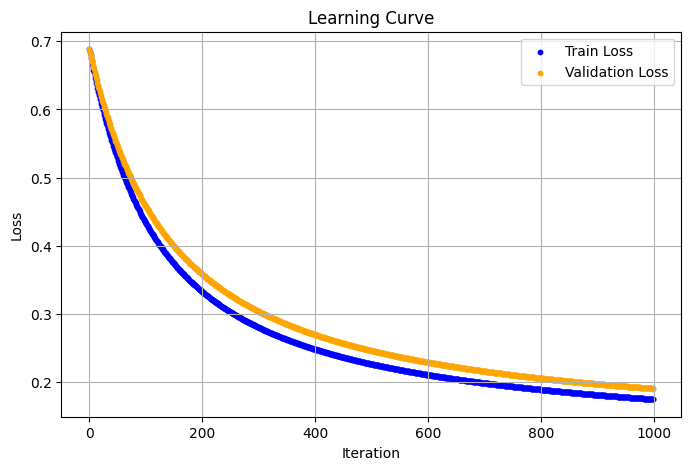

In [25]:
model.fit(X_train, y_train, X_val=X_test, y_val=y_test)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 5))
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.scatter(range(model.iter), model.loss, label='Train Loss', color='blue', s=10)
plt.scatter(range(model.iter), model.val_loss, label='Validation Loss', color='orange', s=10)
plt.legend()
plt.grid(True)
plt.show()


# Problem 7 Visualization of Decision area

Visualize the decision region. The following is a reference diagram. It is drawn with sepal width on the horizontal axis and petal length on the vertical axis.

In [38]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [43]:
slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, lam=0.1, verbose=True)
slr.fit(X_train_scaled, y_train, X_test_scaled, y_test)

Iter 1/1000 - Train Loss: 0.6914 - Val Loss: 0.6914
Iter 2/1000 - Train Loss: 0.6897 - Val Loss: 0.6898
Iter 3/1000 - Train Loss: 0.6881 - Val Loss: 0.6881
Iter 4/1000 - Train Loss: 0.6864 - Val Loss: 0.6864
Iter 5/1000 - Train Loss: 0.6847 - Val Loss: 0.6847
Iter 6/1000 - Train Loss: 0.6831 - Val Loss: 0.6831
Iter 7/1000 - Train Loss: 0.6814 - Val Loss: 0.6815
Iter 8/1000 - Train Loss: 0.6798 - Val Loss: 0.6798
Iter 9/1000 - Train Loss: 0.6782 - Val Loss: 0.6782
Iter 10/1000 - Train Loss: 0.6766 - Val Loss: 0.6766
Iter 11/1000 - Train Loss: 0.6750 - Val Loss: 0.6750
Iter 12/1000 - Train Loss: 0.6734 - Val Loss: 0.6734
Iter 13/1000 - Train Loss: 0.6718 - Val Loss: 0.6719
Iter 14/1000 - Train Loss: 0.6702 - Val Loss: 0.6703
Iter 15/1000 - Train Loss: 0.6687 - Val Loss: 0.6688
Iter 16/1000 - Train Loss: 0.6671 - Val Loss: 0.6672
Iter 17/1000 - Train Loss: 0.6656 - Val Loss: 0.6657
Iter 18/1000 - Train Loss: 0.6641 - Val Loss: 0.6642
Iter 19/1000 - Train Loss: 0.6625 - Val Loss: 0.6627
It

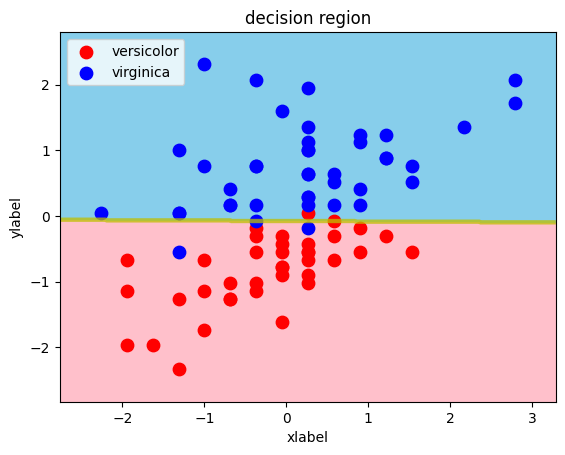

In [44]:
decision_region(X_train_scaled, y_train, slr) #Scratch (C=0.1)

# Problem 8 Saving weights

Let’s save and load the learned weights for easy verification. Use the pickle module and NumPy’s np.savez.

In [46]:
import pickle

# Save learned weights (theta)
def save_weights(model, filename='weights.pkl'):
    with open(filename, 'wb') as f:
        pickle.dump(model.theta, f)

# Load learned weights (theta)
def load_weights(model, filename='weights.pkl'):
    with open(filename, 'rb') as f:
        model.theta = pickle.load(f)


In [47]:
save_weights(model, 'my_weights.pkl')

# Later or elsewhere
load_weights(model, 'my_weights.pkl')
